## Import necessary libraries.

     Id   age           job  marital  education default  balance housing loan  \
0  1001   NaN    management  married   tertiary      no   2143.0     yes   no   
1  1002   NaN           NaN   single  secondary      no     29.0     yes   no   
2  1003   NaN  entrepreneur  married  secondary      no      2.0     yes  yes   
3  1004  47.0   blue-collar  married    unknown      no   1506.0     yes   no   
4  1005  33.0       unknown   single    unknown      no      1.0      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
Rows : 45211, Columns : 18
Id
46211    1
1001     1
1002     1
1003  

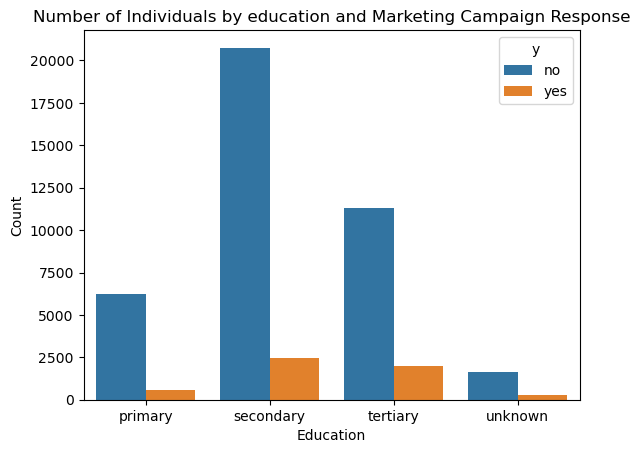

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Open the dataset
df = pd.read_csv("marketing.csv")

# Print first 5 rows of dataset
print(df.head())

# Columns and Rows for the dataset
rows = df.shape[0]
columns = df.shape[1]
print (f"Rows : {rows}, Columns : {columns}")

# Possible values for each column
for column in df.columns:
    print(df[column].value_counts())

# Basic Statistics
grouped_counts = df.groupby(['education', 'y']).size().reset_index(name='count')

# Plotting
sns.barplot(x='education', y='count', hue='y', data=grouped_counts)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Number of Individuals by education and Marketing Campaign Response')
plt.show()

# Marketing outcome prediction for bank clients

The objective is to conduct a study to determine whether a marketing campaign can influence a bank client's decision to invest in a term deposit (Not sure about this). By analyzing various attributes of individuals, the campaign aims to study and predict favorable outcomes for the bank.
A **term deposit** is basically an investment made by the client, with the bank, where the bank uses some of the money invested to work with other clients or business partners and when the deposit expires, returns the initial deposit with an interest rate to the client.

## Data-set classification

- **Attributes classification**

- Id -> identification number of the bank client
- Age -> age of the bank client
- Job -> type of job of the bank client
- Marital -> marital status of the bank client
- Education -> level of education of the bank client
- Default -> If "yes" means, the client has unpaid debt.
- Housing -> If "yes" means, the client has a housing loan.
- Loan -> If "yes" means, the client has a personal loan.
- Contact -> contact communication type
- Day -> Last day that marketing team contacted the bank client.
- Month -> Last month that marketing team contacted the bank client.
- Duration -> last contact duration, in seconds.
- Campaign -> number of contacts performed during this campaign and for this bank client.
- Pdays -> number of days that passed by after the client was last contacted from a previous campaign.
- Previous -> number of contacts performed before this campaign and for this client.
- Poutcome -> outcome of the previous marketing campaign.
- y -> If "yes" means, the client responded positively to the marketing campaign.

### Table for the types of data




## Data preprocessing

First is necessary to parse the data provided by the dataset, and deal with bad values that can interfere with the analysis for the algorithms.

- Duplicate values
- Outliers
- Missing values

In [32]:


# If there are any missing values, the row should be removed.
if (df.isnull().values.any()):
    print(f"There are {df.isnull().values.sum()} values in the dataset")
    df.dropna(inplace = True)
    print(f"There are {df.isnull().values.sum()} values in the dataset")
else:
    print ("There are no missing values in the dataset")

# Redundant columns

##  Column Day and Month can be merged into Day/Month
df['date'] = df['day'].astype(str) + '/' + df['month'].astype(str)
df.drop(columns=['day', 'month'], inplace=True)


# Check for duplicate values
if (df.duplicated().values.any()):
    df.drop_duplicates(inplace = True)
else:
    print ("There are no missing values in the dataset")

# Similarity

## Euclidean Distance
numeric_columns = df.select_dtypes(include=np.number).columns

## This calculation takes a lot of time to compute.
def euclidean_distance(row1, row2):
    numeric_values1 = row1[numeric_columns].values
    numeric_values2 = row2[numeric_columns].values
    return np.sqrt(np.sum(np.square(numeric_values1 - numeric_values2)))
    
for i in range(len(df)):
    for j in range(i+1, len(df)):
        row1 = df.iloc[i]
        row2 = df.iloc[j]
        distance = euclidean_distance(row1, row2)
        print (f"Euclidean distance between id {row1.iloc[0]} and id {row2.iloc[0]} is {distance} ")


## Discretize the dataset, transforming outliers into ordinal values.








There are 16 values in the dataset
There are 0 values in the dataset
There are no missing values in the dataset
Euclidean distance between id 1004 and id 1005 is 1508.7935577805201 
Euclidean distance between id 1004 and id 1006 is 1275.9239789266444 
Euclidean distance between id 1004 and id 1007 is 1066.525198952186 
Euclidean distance between id 1004 and id 1011 is 1242.8519622223719 
Euclidean distance between id 1004 and id 1012 is 1117.080570057505 
Euclidean distance between id 1004 and id 1013 is 1559.0837052576746 
Euclidean distance between id 1004 and id 1014 is 1435.2306434855689 
Euclidean distance between id 1004 and id 1015 is 1346.5812266625433 
Euclidean distance between id 1004 and id 1016 is 1303.4607780827162 
Euclidean distance between id 1004 and id 1017 is 1493.069991661476 
Euclidean distance between id 1004 and id 1018 is 1455.1041199859205 
Euclidean distance between id 1004 and id 1019 is 1451.7021044277644 
Euclidean distance between id 1004 and id 1020 is 1

KeyboardInterrupt: 